# Task Objective:
    Your mission is to design and implement an Information Retrieval (IR) system capable of efficiently
    retrieving relevant documents from a given dataset. Below are the key steps and details for this project:

# Methodology

###  1. Dataset Selection and Preparation

###  2. Data Preprocessing
###  3. User Query Interface
###  4. Retrieval Algorithm
###  5. Query Processing
###  7. User Feedback (Optional)

###  6. Evaluation
###  8. Documentation and Presentation


# 1. Dataset Selection and Preparation:
  - This Dataset is scraped from https://www.thenews.com.pk website. It has news articles from 2015 till date related to     business and sports. It Contains the Heading of the particular Article, Its content and its date. The content also contains the place from where the statement or Article was published.
  - you can download this dataset from kaggle( https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles)
  
### About this csv file
  Data set contains 4 columns

 - Article : Text having the news article and the place where it was published from
- Heading : Text containing the heading of the news article.
- Date : Date when the article was published.
- NewsType : Type of Article i.e business or sports

## Importing Libraries 

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords ,wordnet
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
## Import the dataframe using pandas 
df = pd.read_csv("./dataset/Articles.csv", encoding='latin1')
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [3]:
## Take the rows only necessary
data = df.drop(["Date" ,"Heading"] ,axis = 1)
data.head()

,Article,NewsType
0,KARACHI: The Sindh government has decided to b...,business
1,HONG KONG: Asian markets started 2015 on an up...,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,business
4,NEW YORK: US oil prices Monday slipped below $...,business


# 2. Data Cleaning & Preprocessing
  - Check for missing value
- Remove duplicates text
- Casing
- Removing puntuation

In [4]:
## Check for missing values
data.isna().sum()

Article     0
NewsType    0
dtype: int64

In [5]:
## Check for duplicates
print("Duplicates ",data.duplicated().sum())

data.drop_duplicates(inplace = True) ## drop the duplicate

print("After dropping duplicates" , data.duplicated().sum())

Duplicates  108
After dropping duplicates 0


In [6]:
## Checking for duplicates in article Column
data.duplicated(subset = ["Article"]).sum()


0

In [7]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
## Create a preprocessing function
stops_word = set(stopwords.words("english")) ## Will contain stops words

def preprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text ,flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s\n]','',text)
    
    lemitizer = WordNetLemmatizer()  ## this function converts the word to its base form
    words = word_tokenize(text) ## split the sentence into words/tokens
    lemitize_word = [lemitizer.lemmatize(word ,wordnet.VERB) for word in words]
    newArray = [stop_word for stop_word in lemitize_word if stop_word not in stops_word]
    
    return " ".join(newArray)

    

In [9]:
## Apply preprocessing
data["Article"] = data["Article"].apply(preprocessing)

In [10]:
# check the preprocessed data
data["Article"]

0       karachi sindh government decide bring public t...
1       hong kong asian market start 2015 upswing limi...
2       hong kong hong kong share open 066 percent low...
3       hong kong asian market tumble tuesday follow p...
4       new york us oil price monday slip 50 barrel fi...
                              ...                        
2669    strongdubai dubai international airport flag c...
2670    strongbeijing former prime minister shaukat az...
2671    strongwashington uber ground fleet selfdriving...
2690    strongbeijing new development bank plan cofina...
2691    strongkarachi karachibased technology incubato...
Name: Article, Length: 2584, dtype: object

In [11]:
data["NewsType"].value_counts()

sports      1408
business    1176
Name: NewsType, dtype: int64

# 3. User Query Interface
  - create a query function and preprocess it by using preprocess function from above

In [45]:
## create a input query function

def query():
    query = input("Write the query(Text) :\n ")
    
    query1 = preprocessing(query)  
    
    return query1

In [46]:
query()

Write the query(Text) :
 A business article is a news release, blog, brochure, or another type of document that helps a company share information, either indirectly or directly, about its operations. Employees in various industries, including the software development, information technology (IT), or customer service industries may write business articles to communicate details about their clients. Learning how to write this kind of document can help you perform better as a content writer. In this article, we explain how to write a business article and provide tips to consider as you write.


'business article news release blog brochure another type document help company share information either indirectly directly operations employees various industries include software development information technology customer service industries may write business article communicate detail clients learn write kind document help perform better content writer article explain write business article provide tip consider write'

#  4. Retrieval Algorithm
 - Use cosine_simularity to find the text for the query and print the most likely news article for it

In [54]:
## importing TfidfVectorizer and cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# defining a function 

def algo():
    vectorizer = TfidfVectorizer()   ## convert text to numerical 

    x = data["Article"]

    x_vectorize = vectorizer.fit_transform(x)

    query11 = query()
    query_vectorizer = vectorizer.transform([query11])
    similarity = cosine_similarity(query_vectorizer ,x_vectorize)    ## use cosine simularity to compare the text

    return similarity ,query11


In [ ]:
## Search the text for most relevant match
similarity ,query11 = algo()
max_text_index= similarity.argmax()
print()
print(f"\nThe index is  : {max_text_index}\n")
print( df["Article"][max_text_index])    


KeyboardInterrupt: 

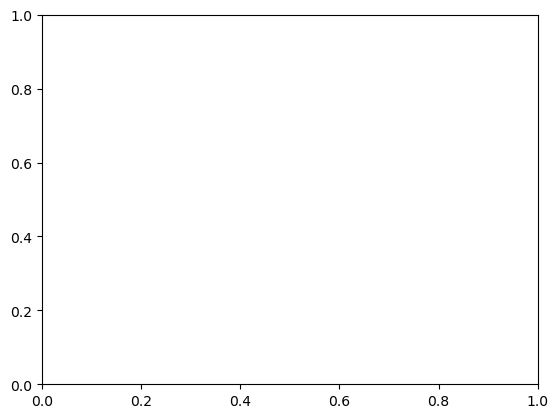